### Back Pain Data Analysis

Meredith Adams, MD  
Jay Urbain, PhD

10/25/2016, 11/5/2016, 11/21/2016, 11/23/2016

Integration of statistical analysis and machine learning methods to identify factors associated with opioid prescribing in NIH research standards for Low Back Pain survey data: a pilot analysis.

<a href="cLBP_RTF_MinimalDataset.pdf">Standford Back Pain Survey</a>.

<a href="data/stanford low back pain survey data.csv">Data set</a> (csv).

#### Introduction:

The recent development of research standards for low back pain (NIH LBP taskforce reference) creates an opportunity for prospective data standardization. Ultimately, the goal of this standardized data collection is to better understand patterns for treatment response and build predictive care models. While the impact of aggregate data will depend on large-scale integration, the focus of this study is to better understand the relationship and predictive ability of the survey variables, specifically examining predictors of opioid use. 
Clinical research is evolving to reflect the need for efficient clinical trial design and data collection, which is reflected by the move toward improved data standardization. A key component of this is adaptive statistical designs and analysis methods. The expert consensus panel developed the NIH task force for research standards questionnaire (LBPTF) to overcome common research barriers while addressing the underlying key clinical questions for low back pain. Specifically, it shifted the focus from anatomic or pathophysiological classification to that of pain interference, functional status, and pain intensity. This focused questionnaire measures these domains using several short forms from PROMIS (Patient-Reported Outcome Measurement Information System).

The novel organizational framework of the LBPTF questionnaire incorporates key clinical self-report measures as well as information about co-morbid conditions, demographic information, and treatment history. Understanding the co-occurence patterns of these data may provide insight into more focused data collection as well as build toward predictive modeling. The inherent limitations of self-reported data are mitigated by the extensive development of the minimum data set variables to incorporate key perceived domains of influence.

Building from this perspective, the objective of this pilot survey was to deconstruct and analyze the inter-relationship of these variables in a way that will provide more meaningful analysis of these data moving forward. Statistical analysis and interpretation can be misleading due to inherent data assumptions, but with the data points selected by expert consensus, this minimum dataset represents the starting point for analyzing these relationships. Recognizing the limitations of a survey snapshot, we planned iterative analyses of a pilot survey obtained during the LBPTF with several statistical and machine learning methods to validate our approach.

#### Results Summary

We performed a preliminary statistical analysis of the back pain dateset.

For the 200-sample dataset, Opioid use negatively affects the population distribution for physical function, physical interference, and pain intensity. All of these results are statistically significant (*p* << 0.05*) using Pearson's $\chi^2$ (Chi-squared) goodness of fit statistic.

We evaluate Logistic Regression (LR), Support Vector Machines (SVM), Decision Trees (DT), and recursive feature elimination for identifying the most predictive features in the data set.

Using all features and 10-fold cross-validation, our predictive accuracies are *0.69, 0.63, and 0.58* for LR, SVM, and DT respectively. 

Using the top 10 features identified using recursive feature elimination for each classifier and 10-fold cross-validation, our predictive accuracies improvei modestly to *0.71, 0.66, and 0.66* for LR, SVM, and DT respectively.

#### Legend

Match columns in the data set to questions in the survey.

DUR - 1. How long has low-back pain been an ongoing problem for you?  
FRE - 2. How often has low-back pain been an ongoing problem for you over the past 6 months?    
NRS - 3. In the past 7 days, how would you rate your low-back pain on average?  
RAD - 4. Has back pain spread down your leg(s) during the past 2 weeks? (radiculopathy)  
PIDAY - 9. How much did pain interfere with your day-to-day activities?  
PIWORK - 10. How much did pain interfere with work around the home?  
PPISOC - 11. How much did pain interfere with your ability to participate in social activities?  
PICHOR - 12. How much did pain interfere with your household chores?  
LBS - 6. Have you ever had a low-back operation?   
LBST - 7. If yes, when was your last back operation?  
FUS - 8. Did any of your back operations involve a spinal fusion?    
OPI - 13. Opioid painkillers, have you used for your back pain?  
INJ - 13. Injections such as epidural steroid injections, facet injections, have you used for your back pain?  
EXE - 13. Exercise therapy, have you used for your back pain?  
PSY - 13. Psychological counseling, have you used for your back pain?  
UNEMP - 14. I have been off work or unemployed for 1 month or more due to low-back pain.   
DIS - 15. I receive or have applied for disability or workers’ compensation benefits because I am unable to work due to low-back pain.  
ABD - 5. Stomach pain  
JOI - 5. Pain in your arms, legs, or joints other than your spine or back  
HEA - 5. Headaches # Widespread pain or pain in most of your body??  
FIB - 15. I receive or have applied for disability benefits because I am unable to work dueto low-back pain.  
CHOR - 16. Are you able to do chores such as vacuuming or yard work?  
STAIR - 17. Are you able to go up and down stairs at a normal pace?  
W15 - 18. Are you able to go for a walk of at least 15 minutes?  
ERANDS 19. Are you able to run errands and shop?  
WORTH -, 20. In the past 7 days, I felt worthless.  
HELPL,  21. In the past 7 days, I felt helpless.  
DEPRES -  22. In the past 7 days, I felt depressed.  
HOPEL -  23.  In the past 7 days, I felt hopeless.  
SLEEPQ - 24.  In the past 7 days, my sleep quality was (choices)  
SREFR - 25.  In the past 7 days, my sleep was refreshing.  
SPROB - 26.  In the past 7 days, I had a problem with my sleep.  
SONSET - 27. I had difficulty falling asleep  
CAT.SAFE - 28.  It’s not really safe for a person with my back problem to be physically active.  
CAT.NEVER, 29.  I feel that my back pain is terrible and it’s never going to get any better.  
LIT,  30.  Are you involved in a lawsuit or legal claim related to your back problem?  
AS -  
ETOH  - 31. Have you drunk or used drugs more than you meant to?
SAHELP – 32. Have you felt you wanted or needed to cut down on your drinking or drug use?   
AGE - 33. Age: years (0–120)   
SEX - 34. Gender (Male/Female/Unknown/Unspecified)
HIS – 35. Hispanic or Latino/Not H or L/Unknown/Unreported)  
NAT - Native American
ASA - Asian
BL - Black or African American
PAC - Native Hawaiian or Pacific Islander
W -  White
UNK - Unknown
NA. – Not reported  
EMP - 37. Employment Status  
EDU - 38. Education Level: (select the highest level attained)   
SMOK - 39. How would you describe your cigarette smoking?   
HT - 40. Height  
WT - 40. Weight  
RACE - 36.  
PI - ??  
FUN - ??  
DEP - 22. ??  
SLEEP - 24. ??  


#### Load the data

In [100]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline 

# Read dataset into a Pandas dataframe
df = pd.read_csv("data/stanford low back pain survey data.csv")
# Dimensions
df.shape

(200, 60)

#### Reveiw and clean the  data

In [101]:
import warnings
warnings.filterwarnings('ignore')

# show column distributions
print(df.describe())

       ID  DUR  FREQ  NRS  RAD  PIDAY  PIWORK  PPISOC  PICHOR  LBS  ...    \
count 200  200   200  199  199    200     200     199     199  200  ...     
mean  116    4     2    5    0      3       3       3       3    0  ...     
std    69    1     1    2    0      1       1       1       1    1  ...     
min     5    1     1    1    0      1       1       1       1    0  ...     
25%    58    3     2  nan  nan      3       3     nan     nan    0  ...     
50%   108    4     3  nan  nan      3       3     nan     nan    0  ...     
75%   172    4     3  nan  nan      4       4     nan     nan    0  ...     
max   242    4     3   10    1      5       5       5       5    2  ...     

       EMP  EDU  SMOK  HT  WT  RACE  PI  FUN  DEP  SLEEP  
count  200  200   119 187 188   181 198  174   96    197  
mean     3    5     0  67 175     4  13   10    7     13  
std      2    2     0   4  42     1   4    3    5      4  
min      0    0     0  50  96     0   4    5    4      4  
25%      1 

In [102]:
# dislay
df.ix[0:10, 0:15]

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,LBST,FUS,OPI,INJ,EXE
0,5,1,2,6,0,3,4,4,3,0,nan,nan,1,1,1
1,8,4,2,3,1,2,2,3,3,0,nan,nan,0,0,1
2,10,3,3,2,1,2,2,1,2,0,nan,nan,0,1,1
3,11,4,2,7,1,4,4,4,4,0,nan,nan,0,0,1
4,12,3,3,6,1,3,4,2,3,0,nan,nan,0,0,0
5,13,3,3,7,1,4,4,4,4,0,nan,nan,0,0,1
6,14,3,1,2,0,1,2,1,2,0,nan,nan,nan,1,1
7,15,4,2,1,0,2,1,1,2,0,nan,nan,1,nan,1
8,16,3,2,5,0,3,3,3,3,0,nan,nan,0,0,nan
9,17,4,2,4,0,4,4,3,4,0,nan,nan,0,0,1


In [103]:
#df.ix[0:10, 15:30]

In [104]:
#df.ix[0:10, 30:45]

In [105]:
#df.ix[0:10, 45:60]

#### Drop columns with a high number of NA values, or have the same answer for most questions

These columns likely correlate to questions with few resonses. See legend above.

In [106]:
df=df.drop(['HIS','NAT','ASA','BL','PAC','W','UNK','NA.','LBST','FUS','BL','PAC','W','UNK','NA.','SMOK'], axis=1)
df=df.drop(['SAHELP'], axis=1)
df.head(10)

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,...,SEX,EMP,EDU,HT,WT,RACE,PI,FUN,DEP,SLEEP
0,5,1,2,6,0,3,4,4,3,0,...,0,1,0,72,123,5,14,11,20,11
1,8,4,2,3,1,2,2,3,3,0,...,0,1,6,69,175,5,10,7,12,9
2,10,3,3,2,1,2,2,1,2,0,...,1,1,8,67,130,5,7,5,10,10
3,11,4,2,7,1,4,4,4,4,0,...,1,1,6,62,108,5,16,12,18,17
4,12,3,3,6,1,3,4,2,3,0,...,0,1,4,74,260,5,12,12,7,13
5,13,3,3,7,1,4,4,4,4,0,...,1,1,7,64,170,5,16,13,6,12
6,14,3,1,2,0,1,2,1,2,0,...,1,1,7,66,198,5,6,nan,5,13
7,15,4,2,1,0,2,1,1,2,0,...,1,1,3,64,125,5,6,nan,7,7
8,16,3,2,5,0,3,3,3,3,0,...,1,1,7,68,185,5,12,nan,nan,6
9,17,4,2,4,0,4,4,3,4,0,...,0,1,9,68,190,5,15,9,9,10


#### Set remaining NA values to a default

In [107]:
df.columns

Index(['ID', 'DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'OPI', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'AGE', 'SEX', 'EMP',
       'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP'],
      dtype='object')

In [108]:
# set remaining NA to 0
df.fillna(0, inplace=True)
df.head(10)

,ID,DUR,FREQ,NRS,RAD,PIDAY,PIWORK,PPISOC,PICHOR,LBS,...,SEX,EMP,EDU,HT,WT,RACE,PI,FUN,DEP,SLEEP
0,5,1,2,6,0,3,4,4,3,0,...,0,1,0,72,123,5,14,11,20,11
1,8,4,2,3,1,2,2,3,3,0,...,0,1,6,69,175,5,10,7,12,9
2,10,3,3,2,1,2,2,1,2,0,...,1,1,8,67,130,5,7,5,10,10
3,11,4,2,7,1,4,4,4,4,0,...,1,1,6,62,108,5,16,12,18,17
4,12,3,3,6,1,3,4,2,3,0,...,0,1,4,74,260,5,12,12,7,13
5,13,3,3,7,1,4,4,4,4,0,...,1,1,7,64,170,5,16,13,6,12
6,14,3,1,2,0,1,2,1,2,0,...,1,1,7,66,198,5,6,0,5,13
7,15,4,2,1,0,2,1,1,2,0,...,1,1,3,64,125,5,6,0,7,7
8,16,3,2,5,0,3,3,3,3,0,...,1,1,7,68,185,5,12,0,0,6
9,17,4,2,4,0,4,4,3,4,0,...,0,1,9,68,190,5,15,9,9,10


#### Define data types

Ensure that survey attribures are interpreted by the correct datat type.

In [109]:
df['ID']=df['ID']
df['DUR']=df['DUR'].astype('int')
df['FREQ']=df['FREQ'].astype('int')
df['NRS']=df['NRS'].astype('int')
df['RAD']=df['RAD'].astype('category')

df['PIDAY']=df['PIDAY'].astype('int')
df['PIWORK']=df['PIWORK'].astype('int')
df['PPISOC']=df['PPISOC'].astype('int')
df['PICHOR']=df['PICHOR'].astype('int')

df['LBS']=df['LBS'].astype('category')
df['OPI']=df['OPI'].astype('category')
df['INJ']=df['INJ'].astype('category')
df['EXE']=df['EXE'].astype('category')
df['PSY']=df['PSY'].astype('category')
df['UNEMP']=df['UNEMP'].astype('category')
df['DIS']=df['DIS'].astype('category')
df['ABD']=df['ABD'].astype('int')
df['JOI']=df['JOI'].astype('int')
df['HEA']=df['HEA'].astype('int')
df['FIB']=df['FIB'].astype('int')
df['CHOR']=df['CHOR'].astype('int')
df['STAIR']=df['STAIR'].astype('int')
df['W15']=df['W15'].astype('int')
df['ERANDS']=df['ERANDS'].astype('int')
df['WORTHL']=df['WORTHL'].astype('int')
df['HELPL']=df['HELPL'].astype('int')
df['DEPRES']=df['DEPRES'].astype('int')
df['HOPEL']=df['HOPEL'].astype('int')
df['SLEEPQ']=df['SLEEPQ'].astype('int')
df['SREFR']=df['SREFR'].astype('int')
df['SPROB']=df['SPROB'].astype('int')
df['SONSET']=df['SONSET'].astype('int')
df['CAT.SAFE']=df['CAT.SAFE'].astype('int')
df['CAT.NEVER']=df['CAT.NEVER'].astype('int')
df['LIT']=df['LIT'].astype('int')
df['AS']=df['AS'].astype('int')
df['ETOH']=df['ETOH'].astype('int')
df['AGE']=df['AGE'].astype('int')
df['SEX']=df['SEX'].astype('category')
df['EMP']=df['EMP'].astype('category')
df['EDU']=df['EDU'].astype('int')
df['HT']=df['HT'].astype('int')
df['WT']=df['WT'].astype('int')
df['RACE']=df['RACE'].astype('category')
df['PI']=df['PI'].astype('int')
df['FUN']=df['FUN'].astype('int')
df['DEP']=df['DEP'].astype('int')
df['SLEEP']=df['SLEEP'].astype('int')

### Data analysis


#### Pain chi-squared goodness-of-fit test
    
Tests whether the distribution of sample categorical data matches an expected distribution.
Chi-squared tests are based on the so-called chi-squared statistic. You calculate the chi-squared statistic with the following formula:

$sum(\dfrac{(observed−expected)^2}{expected})$  


In the formula, observed is the actual observed count for each category and expected is the expected count based on the distribution of the population for the corresponding category. We can use this to see if the value of any factor (categorical) attribute affects the distribution of another attribute. For the purposes of this analysis we will assume the "population" is represented by the entire survey sample.

#### Data distribution

Note distribution will not properly reflect categorical attributes.

In [110]:
df.describe()

,ID,DUR,FREQ,NRS,PIDAY,PIWORK,PPISOC,PICHOR,ABD,JOI,...,AS,ETOH,AGE,EDU,HT,WT,PI,FUN,DEP,SLEEP
count,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
mean,116,4,2,5,3,3,3,3,0,1,...,0,0,45,5,63,164,13,9,3,13
std,69,1,1,2,1,1,1,1,1,1,...,1,1,15,2,17,58,4,4,5,4
min,5,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,58,3,2,4,3,3,2,2,0,1,...,0,0,35,3,64,140,11,6,0,10
50%,108,4,3,6,3,3,3,4,0,1,...,0,0,46,6,66,165,13,9,0,12
75%,172,4,3,7,4,4,4,4,1,2,...,1,1,56,6,70,197,16,12,5,16
max,242,4,3,10,5,5,5,5,2,2,...,3,3,81,9,77,350,20,17,20,20


#### Histogram of patients by age

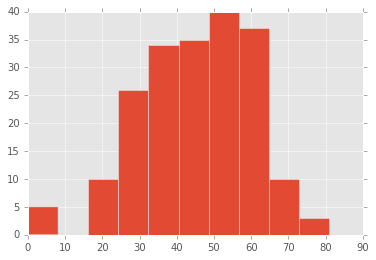

In [111]:
df['AGE'].hist(bins=10)

### Physical Function

CHOR - 16. Are you able to do chores such as vacuuming or yard work?  
STAIR - 17. Are you able to go up and down stairs at a normal pace?  
W15 - 18. Are you able to go for a walk of at least 15 minutes?  
ERANDS 19. Are you able to run errands and shop?  

#### Cross-tabulation of patients by physical funciton

In [112]:
result = df[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0).T
result.index=['Chores','Up/down stairs','Walk 15 min.','Erands']
result.columns=['NA','w/ difficulty','w/ a little difficulty','w/ some difficulty','w/ much difficulty','Unable to do so']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,NA,w/ difficulty,w/ a little difficulty,w/ some difficulty,w/ much difficulty,Unable to do so
Chores,24,13,58,70,35,0
Up/down stairs,3,54,58,48,33,4
Walk 15 min.,1,71,53,50,22,3
Erands,1,49,68,56,21,5


#### Bar plot of number of patient by physical function

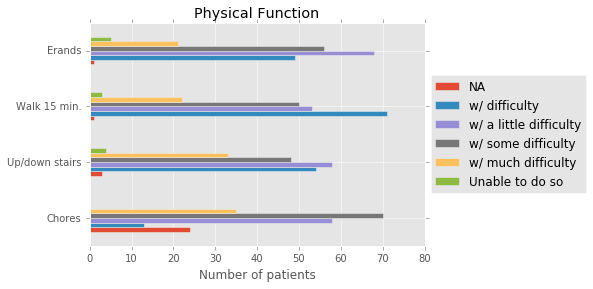

In [113]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Physical Function")
plt.set_xlabel("Number of patients")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt

# horizontal bar plot stacked
#result.plot.barh(title="Physical Function", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Box plot showing distribution of patients by physical function

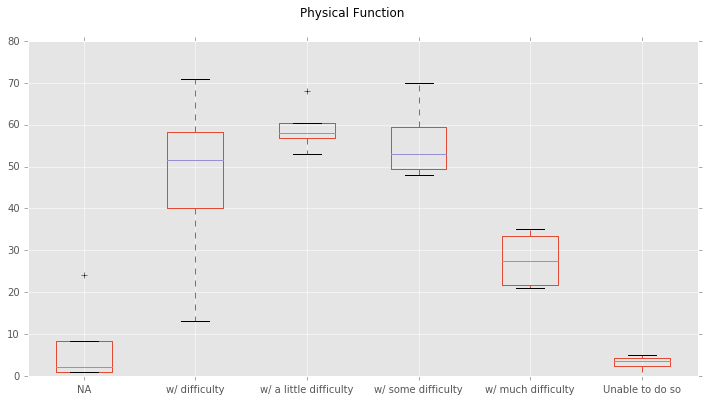

In [114]:
# Boxplot
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
fig.suptitle('Physical Function', fontsize=12)
plt = result.boxplot()

#### Are the distriubutions of physical function categories affected by opioid pain killers?

In [115]:
import numpy as np
import pandas as pd
import scipy.stats as stats

result_population = df[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0)
df_observed = df.loc[df['OPI']==1]             
result_observed = df_observed[['CHOR','STAIR','W15','ERANDS']].apply(pd.value_counts).fillna(0)

# remove small values (Category 0)
result_population = result_population[1:]
result_observed = result_observed[1:]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

print()
print("Remove CHOR - can not use zero values for chi-squared")
result_population = result_population[['STAIR','W15','ERANDS']]
result_observed = result_observed[['STAIR','W15','ERANDS']]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'STAIR','W15','ERANDS'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='Not at all' -> 5 'Very much')
   CHOR  STAIR  W15  ERANDS
1    13     54   71      49
2    58     58   53      68
3    70     48   50      56
4    35     33   22      21
5     0      4    3       5

Observed with OPI=1
   CHOR  STAIR  W15  ERANDS
1    12     23   32      22
2    27     31   29      38
3    43     34   35      37
4    25     24   17      15
5     0      4    3       4

Remove CHOR - can not use zero values for chi-squared
Population (1='Not at all' -> 5 'Very much')
   STAIR  W15  ERANDS
1     54   71      49
2     58   53      68
3     48   50      56
4     33   22      21
5      4    3       5

Observed with OPI=1
   STAIR  W15  ERANDS
1     23   32      22
2     31   29      38
3     34   35      37
4     24   17      15
5      4    3       4

Chi statistic, p-values for 'STAIR','W15','ERANDS'
Power_divergenceResult(statistic=array([ 36.9031406 ,  37.92682338,  36.47355942]), pvalue=array([  1.88599051e-07,   1.16019158e-07,   2.31206253e-07]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of physical function sans 'CHOR'*

### Pain Interference

PIDAY - 9. How much did pain interfere with your day-to-day activities?  
PIWORK - 10. How much did pain interfere with work around the home?  
PPISOC - 11. How much did pain interfere with your ability to participate in social activities?  
PICHOR - 12. How much did pain interfere with your household chores? 

#### Cross-tabulation of patients by physical interference

In [116]:
result = df[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0).T
result.index=['Day to day activities','Work around home','Social activities','Household chores']
result.columns=['NA','Not at all','A little bit','Somewhat','Quite a bit','Very much']
pd.options.display.float_format = '{:,.0f}'.format
result

,NA,Not at all,A little bit,Somewhat,Quite a bit,Very much
Day to day activities,0,6,39,71,51,33
Work around home,0,7,35,61,59,38
Social activities,1,24,35,56,53,31
Household chores,1,10,40,46,65,38


#### Bar plot of number of patient by pain interference

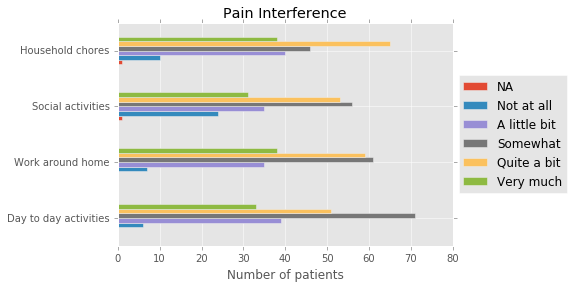

In [117]:
plt = result.plot.barh(title="Pain Interference")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.set_xlabel("Number of patients")
#result.plot.barh(title="Pain Interference", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Box plot showing distribution of patients by pain interference

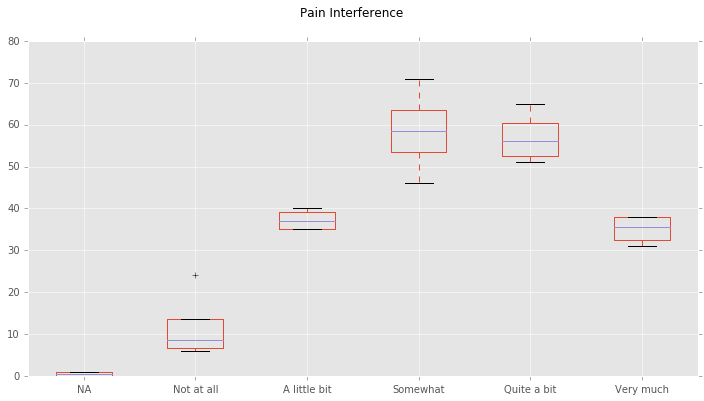

In [118]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6)
fig.suptitle('Pain Interference', fontsize=12)
plt = result.boxplot()

In [119]:
#### Are the distriubutions of pain interferance categories affected by opioid pain killers?

In [120]:
import numpy as np
import pandas as pd
import scipy.stats as stats

result_population = df[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0)
df_observed = df.loc[df['OPI']==1]             
result_observed = df_observed[['PIDAY','PIWORK','PPISOC','PICHOR']].apply(pd.value_counts).fillna(0)

# remove small values (Category 0)
result_population = result_population[1:]
result_observed = result_observed[1:]

print("Population (1='Not at all' -> 5 'Very much')")
print( result_population )
print()
print("Observed with OPI=1")
print( result_observed ) 

print()
# print("Remove CHOR - can not use zero values for chi-squared")
# result_population = result_population[['STAIR','W15','ERANDS']]
# result_observed = result_observed[['STAIR','W15','ERANDS']]

# print("Population (1='Not at all' -> 5 'Very much')")
# print( result_population )
# print()
# print("Observed with OPI=1")
# print( result_observed ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'PIDAY','PIWORK','PPISOC','PICHOR'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='Not at all' -> 5 'Very much')
   PIDAY  PIWORK  PPISOC  PICHOR
1      6       7      24      10
2     39      35      35      40
3     71      61      56      46
4     51      59      53      65
5     33      38      31      38

Observed with OPI=1
   PIDAY  PIWORK  PPISOC  PICHOR
1      2       4       9       4
2     18      14      20      21
3     38      28      27      22
4     30      40      32      39
5     28      30      27      29


Chi statistic, p-values for 'PIDAY','PIWORK','PPISOC','PICHOR'
Power_divergenceResult(statistic=array([ 38.71702172,  39.5410279 ,  39.65831232,  37.67831808]), pvalue=array([  7.96987597e-08,   5.38545165e-08,   5.09305745e-08,
         1.30551073e-07]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of pain interference.*

### Pain Intensity

NRS - 3. In the past 7 days, how would you rate your low-back pain on average?

#### Cross-tabulation of patients by pain intensity

In [121]:
result = df[['NRS']].apply(pd.value_counts).fillna(0).T
#result.reindex_axis(sorted(result.columns), axis=1)
#result.sort_index(axis=1)
pd.options.display.float_format = '{:,.0f}'.format
result = result[[0,1,2,3,4,5,6,7,8,9,10]]
result

,0,1,2,3,4,5,6,7,8,9,10
NRS,1,3,14,25,27,26,32,39,18,10,5


#### Bar plot of number of patient by pain intensity

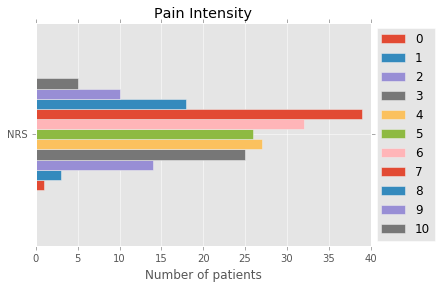

In [122]:
plt = result.plot.barh(title="Pain Intensity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.set_xlabel("Number of patients")
#result.plot.barh(title="Pain Intensity", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Is the distriubution of pain intensity categories affected by opioid pain killers?

In [123]:
import numpy as np
import pandas as pd
import scipy.stats as stats

df_observed = df.loc[df['OPI']==1]             
result_population = df[['NRS']].apply(pd.value_counts).fillna(0)
result_observed = df_observed[['NRS']].apply(pd.value_counts).fillna(0)

# remove 
result_population = result_population[1:]

print("Population (1='No pain' -> 10 'Worst imaginable pain')")
print( result_population.sort_index() )
print()
print("Observed with OPI=1")
print( result_observed.sort_index() ) 

# Get observed counts
print()
print("Chi statistic, p-values for 'NRS'")
print ( stats.chisquare(f_obs= result_observed,   # Array of observed counts
                f_exp= result_population) )  # Array of expected counts

Population (1='No pain' -> 10 'Worst imaginable pain')
    NRS
0     1
1     3
2    14
3    25
4    27
5    26
6    32
8    18
9    10
10    5

Observed with OPI=1
    NRS
1     3
2     6
3    13
4    13
5    15
6    21
7    20
8    12
9     9
10    4

Chi statistic, p-values for 'NRS'
Power_divergenceResult(statistic=array([ 22.31784748]), pvalue=array([ 0.0079244]))


*The use of opioid painkillers is statistically significant (all p-values << 0.05) for altering the distribution of all categories of pain intensity.*

#### Comparitive analysis of duration, frequency, pain intensity, and raduculopathy

DUR - 1. How long has low-back pain been an ongoing problem for you?  
FREQ-2. How often has low-back pain been an ongoing problem for you over the past 6 months?  
NRS - 3. In the past 7 days, how would you rate your low-back pain on average?  
RAD - 4. Has back pain spread down your leg(s) during the past 2 weeks? (radiculopathy)

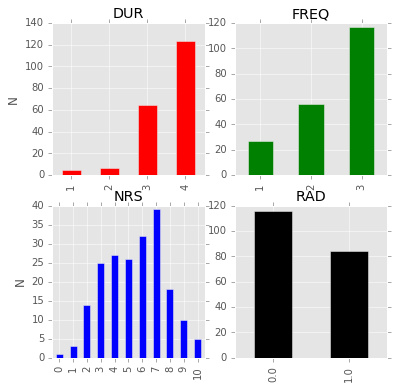

In [124]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

'''
['ID', 'DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'OPI', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'SAHELP', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']
'''
fig, ax = plt.subplots(2,2)
# plt.subplots_adjust(10,10)
fig.set_size_inches(6, 6)
# ax.set_title('How long has low-back pain been an ongoing problem for you?')
df[['DUR', 'ID']].groupby(['DUR']).count().plot.bar(ax=ax[0][0], stacked=False, color='r')
ax[0][0].set_title('DUR')
ax[0][0].legend_.remove()
ax[0][0].set_ylabel('N')
ax[0][0].set_xlabel('')

df[['FREQ', 'ID']].groupby(['FREQ']).count().plot.bar(ax=ax[0][1], stacked=False, color='g')
ax[0][1].set_title('FREQ')
ax[0][1].legend_.remove()
#ax[0][1].set_ylabel('N')
ax[0][1].set_xlabel('')

df[['NRS', 'ID']].groupby(['NRS']).count().plot.bar(ax=ax[1][0], stacked=False, color='b')
ax[1][0].set_title('NRS')
ax[1][0].legend_.remove()
ax[1][0].set_ylabel('N')
ax[1][0].set_xlabel('')

df[['RAD', 'ID']].groupby(['RAD']).count().plot.bar(ax=ax[1][1], stacked=False, color='k')
ax[1][1].set_title('RAD')
ax[1][1].legend_.remove()
# ax[1][1].set_ylabel('N')
ax[1][1].set_xlabel('')

#### Cross tab of duration, frequency, and pain intensity

In [125]:
df[['DUR','FREQ','NRS']].describe()

,DUR,FREQ,NRS
count,200,200,200
mean,4,2,5
std,1,1,2
min,1,1,0
25%,3,2,4
50%,4,3,6
75%,4,3,7
max,4,3,10


#### Distribution for raduculopathy

In [126]:
df[['RAD']].describe()

,RAD
count,200
unique,2
top,0
freq,116


### Machine learning methods for feature selection and predictive accuracy

#### What is the predictive accuracy of opioid use using a (linear) logistic regression model using all features?

Use logistic regression to fit a model using all attributies to predict opioid use.

Validate using 10-fold cross validation.

List the accuracy and the confusion matrix.

#### Logistic Regression

Binary Logistic Regression is a special type of regression where binary response variable is related to a set of explanatory variables, which can be discrete and/or continuous.

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0

features = ['DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'INJ', 'EXE', 'PSY', 'UNEMP', 'DIS', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']

target = ['OPI']

labels = df[target]["OPI"]

# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(df[features], labels)
print(model)

# make predictions

expected = df[target]
predicted = model.predict(df[features])

# # summarize the fit of the model
# print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected, predicted))

scores = cross_val_score(model, df[features], df[target]["OPI"], cv=10)
print( "Cross validation scores using all features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using all features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Cross validation scores using all features
[ 0.66666667  0.47619048  0.76190476  0.76190476  0.7         0.65
  0.73684211  0.73684211  0.68421053  0.78947368]
Mean accuracy using all features: 0.70 (+/- 0.17)


*Accuracy is ~0.70 for a Logistic Regression Model using all features to predict opioid use.*

#### Support Vector Machine

Discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

In [129]:
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

labels = df[target]["OPI"]

# fit a logistic regression model to the data
model = svm.SVC(kernel='linear', C=1)
model.fit(df[features], labels)
print(model)

# make predictions
expected = df[target]
predicted = model.predict(df[features])

# # summarize the fit of the model
# print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected, predicted))

scores = cross_val_score(model, df[features], df[target]["OPI"], cv=10)
print( "Cross validation scores using all features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using all features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Cross validation scores using all features
[ 0.61904762  0.38095238  0.71428571  0.71428571  0.7         0.65
  0.63157895  0.63157895  0.57894737  0.68421053]
Mean accuracy using all features: 0.63 (+/- 0.19)


*Accuracy is ~0.63 for a Support Vector Machine model using all features to predict opioid use.*

#### CART Decision Tree (unpruned)

Non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [130]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

labels = df[target]["OPI"]

# fit a logistic regression model to the data
model = DecisionTreeClassifier()
model.fit(df[features], labels)
print(model)

# make predictions
expected = df[target]
predicted = model.predict(df[features])

# # summarize the fit of the model
# print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected, predicted))

scores = cross_val_score(model, df[features], df[target]["OPI"], cv=10)
print( "Cross validation scores using all features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using all features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Cross validation scores using all features
[ 0.71428571  0.52380952  0.57142857  0.57142857  0.5         0.45
  0.63157895  0.47368421  0.52631579  0.73684211]
Mean accuracy using all features: 0.57 (+/- 0.18)


*Accuracy is ~0.57 for an unpruned CART decision tree model using all features to predict opioid use.*

#### Can we improve predicitve accuracy by identifying the most important features?

In [131]:
def most_informative_features(feature_names, clf, n=20):
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print( "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2) )

#### Logistic Regression feature weights

In [132]:
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# fit a LR model to the data
model = LogisticRegression()
model.fit(df[features], df[target])
print(model)

# display the relative importance of each attribute
most_informative_features(features, model, n=10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
	-0.9417	ERANDS         		1.4531	DIS            
	-0.7572	LIT            		1.3499	INJ            
	-0.4769	FREQ           		1.1728	EXE            
	-0.4629	CHOR           		0.6747	SEX            
	-0.4611	CAT.SAFE       		0.6076	SPROB          
	-0.4582	PICHOR         		0.6049	PIWORK         
	-0.2963	SREFR          		0.5378	PSY            
	-0.2481	ABD            		0.3997	STAIR          
	-0.2344	EDU            		0.3504	LBS            
	-0.1837	SONSET         		0.2946	RAD            


#### Support Vector Machine feature weights

In [133]:
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

# fit a SVM model to the data
model = svm.SVC(kernel='linear', C=1)
model.fit(df[features], df[target])
print(model)

# display the relative importance of each attribute
most_informative_features(features, model, n=10)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
	-1.0000	LIT            		1.5660	DIS            
	-0.7804	ERANDS         		1.2498	INJ            
	-0.7243	CAT.SAFE       		1.0110	EXE            
	-0.4614	CHOR           		0.6929	SEX            
	-0.3670	FREQ           		0.4635	PIWORK         
	-0.3655	PICHOR         		0.3761	SPROB          
	-0.2631	DUR            		0.3198	JOI            
	-0.2583	SONSET         		0.3049	RAD            
	-0.1813	EDU            		0.2777	FUN            
	-0.1796	NRS            		0.2685	LBS            


In [134]:
#### Decision Tree feature importances (Gini Index)

In [135]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(df[features], df[target])
print(model)

# make predictions
# make predictions
expected = df[target]
predicted = model.predict(df[features])

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

# display the relative importance of each attribute
print(model.feature_importances_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        84
        1.0       1.00      1.00      1.00       116

avg / total       1.00      1.00      1.00       200

[[ 84   0]
 [  0 116]]
[ 0.01539409  0.          0.01910446  0.          0.          0.
  0.03054383  0.04926108  0.          0.13809487  0.06064969  0.
  0.01642036  0.          0.0410509   0.0536809   0.          0.
  0.00937031  0.03078818  0.          0.          0.          0.038128
  0.01759324  0.          0.          0.          0.          0.03239452
  0.          0.          0.00984384  0.01710454  0.01368363  0.17089057
  0.          0.          0.06442357  

#### Plot the learned decision tree

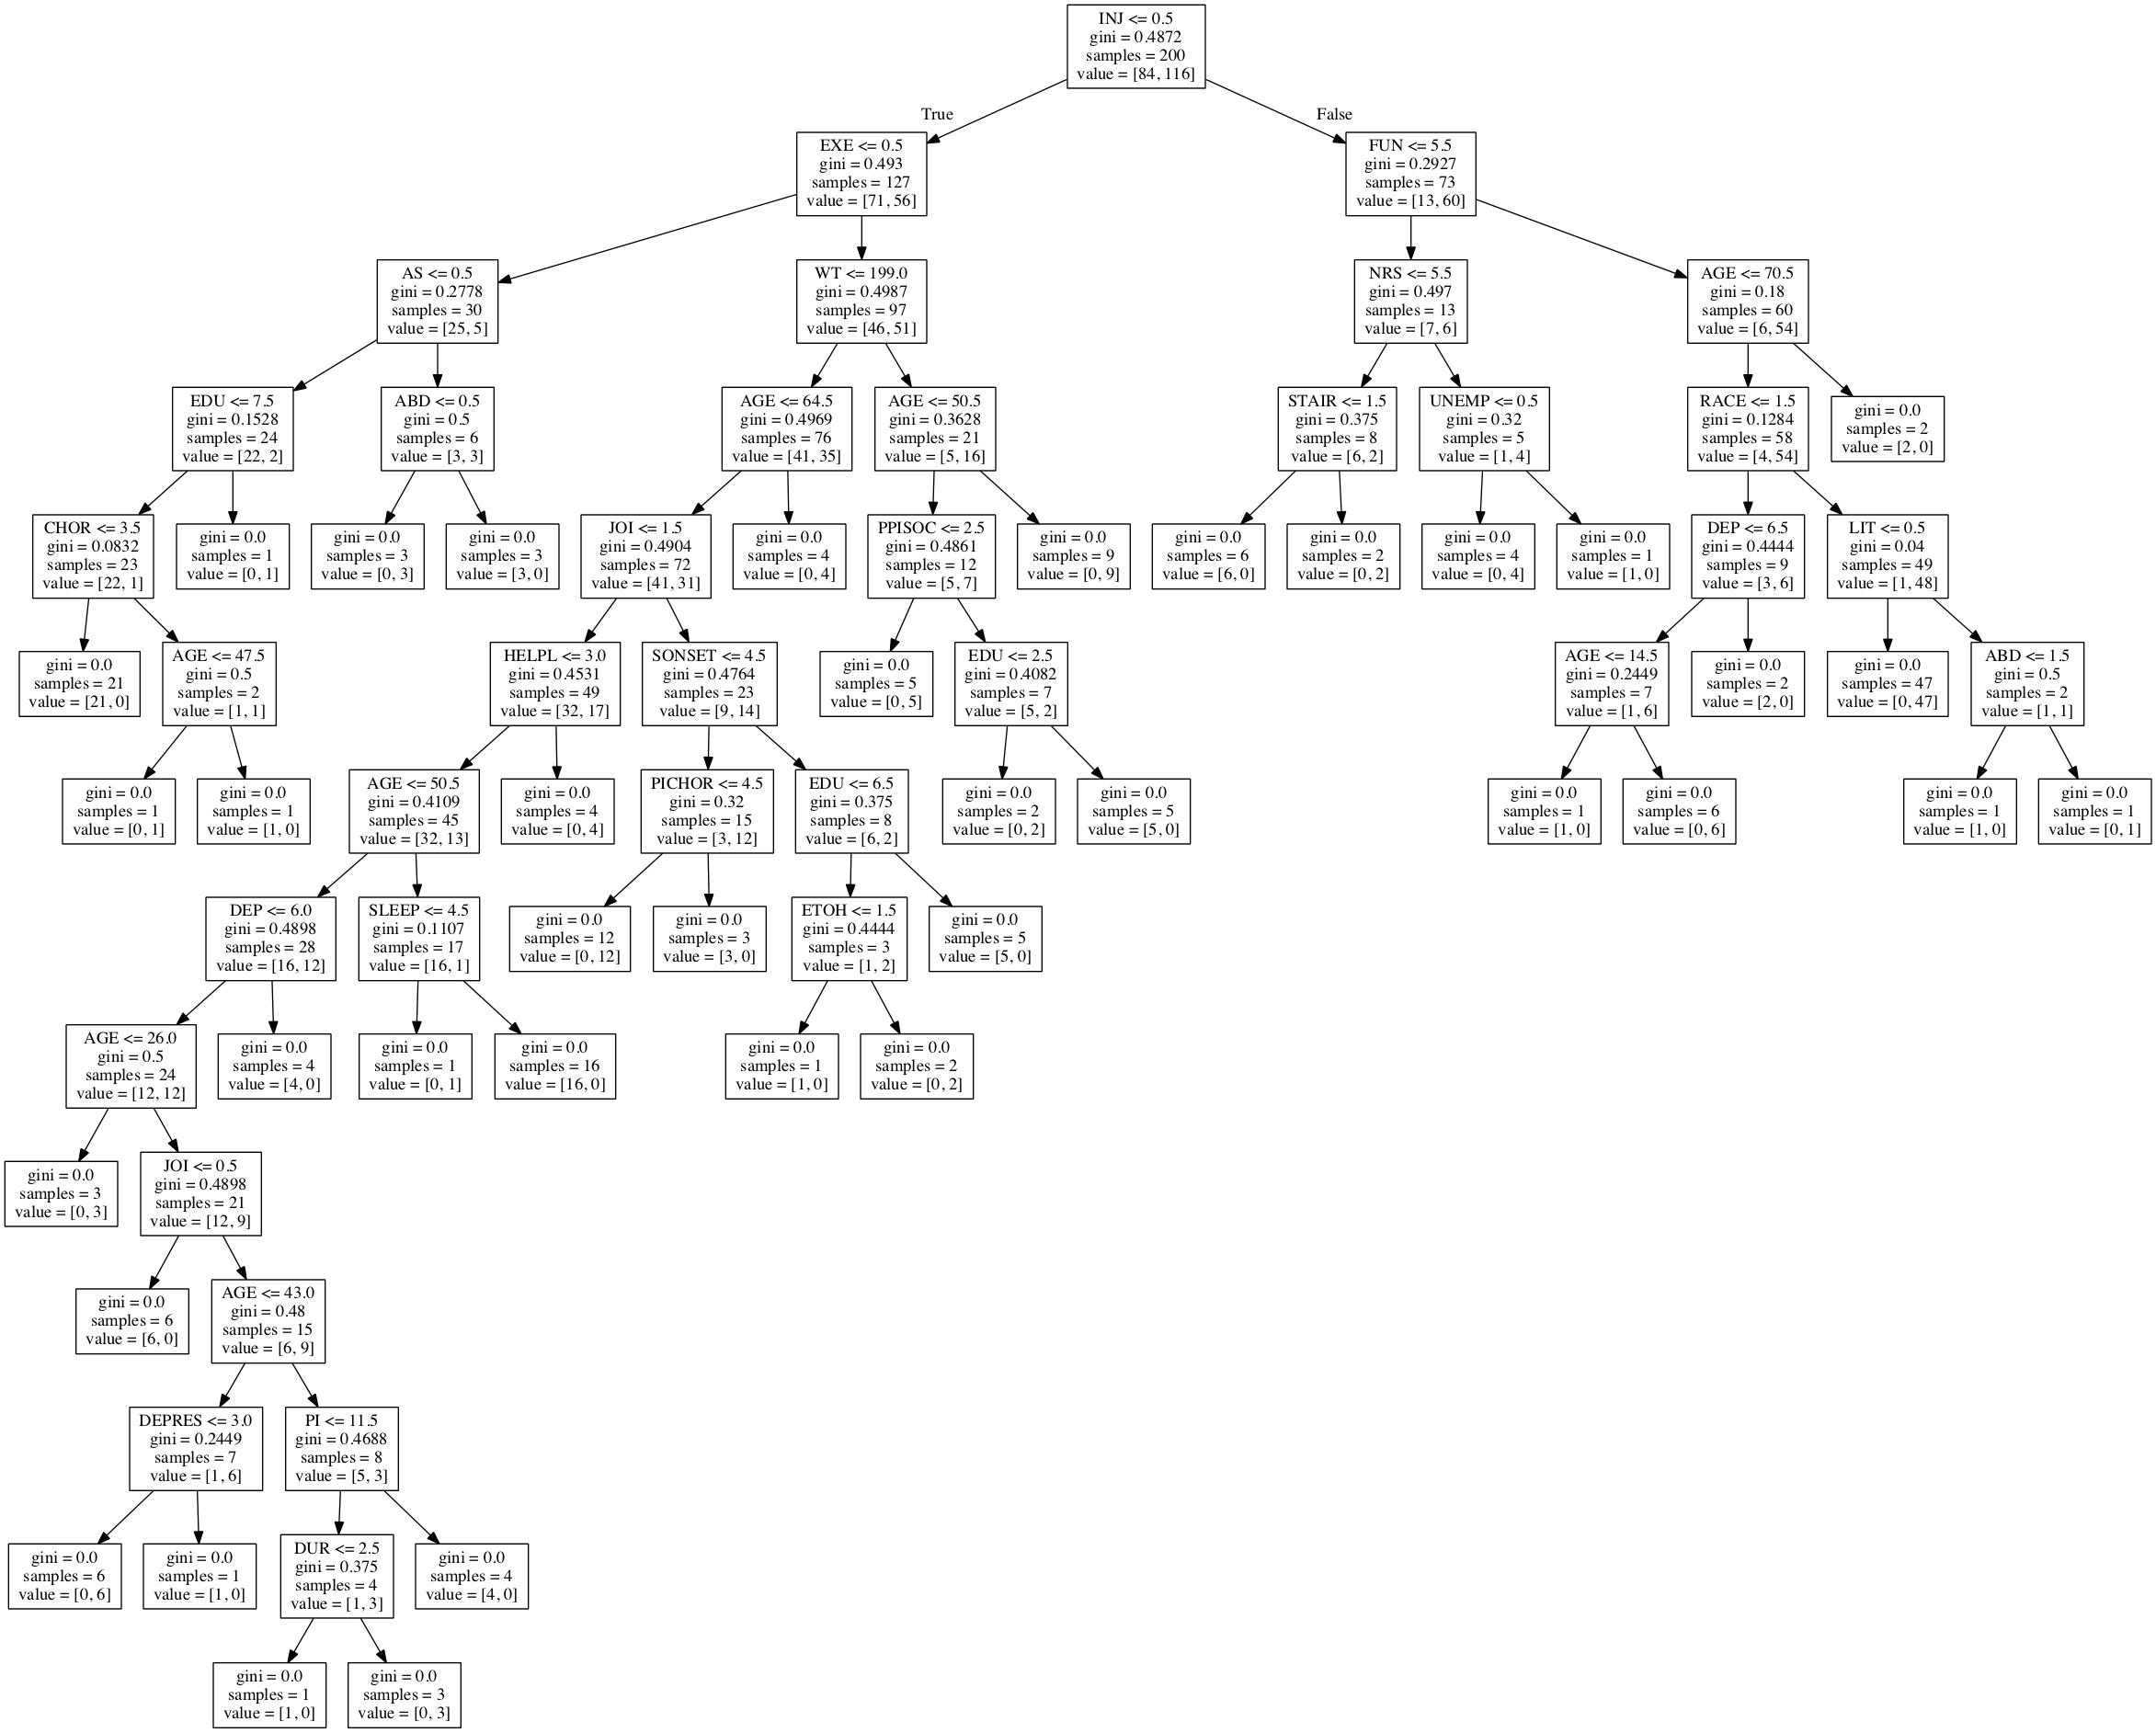

In [136]:
from sklearn.tree import export_graphviz
import graphviz
import os

export_graphviz(model, feature_names=features, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Note: you may need to execute the following from the command line
os.system("dot -Tpng mytree.dot -o mytree.png")

from IPython.display import Image
Image(filename='mytree.png')


# from sklearn import tree
# from IPython.display import Image  
# import pydotplus 

# dot_data = tree.export_graphviz(model, out_file=None, 
#                          feature_names=features,  
#                          #class_names=iris.target_names,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# # graph = pydotplus.graph_from_dot_data(dot_data)  
# # Image(graph.create_png())  

#### Recursive feature elimination to select attributes

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) selects features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Select the 10 most selective attributes

In [137]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
model = DecisionTreeClassifier()
model = svm.SVC(kernel='linear', C=1)
# print( features )
# print( target )

# create the RFE model and select 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )


[False  True False  True False False False False False  True  True False
 False  True False  True False False  True False False  True False False
 False False False False False False False False  True False False False
  True False False False False False False False False False]
[13  1 15  1 30  4 17  5  2  1  1 11 14  1 24  1 33 32  1 16 27  1 10 18 22
 12 20 19  8  7  6 26  1 35 28 34  1 29  9 37 36 23 31  3 21 25]
Top ten features:
['FREQ' 'RAD' 'INJ' 'EXE' 'DIS' 'JOI' 'CHOR' 'ERANDS' 'LIT' 'SEX']
Features sorted by their rank:
[(1, 'CHOR'), (1, 'DIS'), (1, 'ERANDS'), (1, 'EXE'), (1, 'FREQ'), (1, 'INJ'), (1, 'JOI'), (1, 'LIT'), (1, 'RAD'), (1, 'SEX'), (2, 'LBS'), (3, 'FUN'), (4, 'PIWORK'), (5, 'PICHOR'), (6, 'CAT.SAFE'), (7, 'SONSET'), (8, 'SPROB'), (9, 'EDU'), (10, 'WORTHL'), (11, 'PSY'), (12, 'HOPEL'), (13, 'DUR'), (14, 'UNEMP'), (15, 'NRS'), (16, 'STAIR'), (17, 'PPISOC'), (18, 'HELPL'), (19, 'SREFR'), (20, 'SLEEPQ'), (21, 'DEP'), (22, 'DEPRES'), (23, 'RACE'), (24, 'ABD'), (25, '

### Predictive accuracy

#### Accuarcy using top 10 features from recursive feature elimiation

In [138]:
print( features_top10 )

['FREQ' 'RAD' 'INJ' 'EXE' 'DIS' 'JOI' 'CHOR' 'ERANDS' 'LIT' 'SEX']


In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = LogisticRegression()

labels = df[target]["OPI"]

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["OPI"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['FREQ' 'RAD' 'INJ' 'EXE' 'PSY' 'DIS' 'CHOR' 'ERANDS' 'LIT' 'FUN']
Features sorted by their rank:
[(1, 'CHOR'), (1, 'DIS'), (1, 'ERANDS'), (1, 'EXE'), (1, 'FREQ'), (1, 'FUN'), (1, 'INJ'), (1, 'LIT'), (1, 'PSY'), (1, 'RAD'), (2, 'SEX'), (3, 'PIDAY'), (4, 'PICHOR'), (5, 'CAT.SAFE'), (6, 'SPROB'), (7, 'SONSET'), (8, 'STAIR'), (9, 'DUR'), (10, 'PIWORK'), (11, 'W15'), (12, 'SREFR'), (13, 'LBS'), (14, 'JOI'), (15, 'ABD'), (16, 'SLEEPQ'), (17, 'WORTHL'), (18, 'ETOH'), (19, 'EDU'), (20, 'NRS'), (21, 'HOPEL'), (22, 'PPISOC'), (23, 'PI'), (24, 'HELPL'), (25, 'DEP'), (26, 'DEPRES'), (27, 'UNEMP'), (28, 'RACE'), (29, 'SLEEP'), (30, 'HEA'), (31, 'CAT.NEVER'), (32, 'FIB'), (33, 'AS'), (34, 'HT'), (35, 'WT'), (36, 'EMP'), (37, 'AGE')]
Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0

*Accuracy is 0.71 for Logistic Regression classifier using top 10 features.*

#### Support Vector Machine

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = svm.SVC(kernel='linear', C=1)

labels = df[target]["OPI"]
rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["OPI"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))




Top ten features:
['FREQ' 'RAD' 'INJ' 'EXE' 'DIS' 'JOI' 'CHOR' 'ERANDS' 'LIT' 'SEX']
Features sorted by their rank:
[(1, 'CHOR'), (1, 'DIS'), (1, 'ERANDS'), (1, 'EXE'), (1, 'FREQ'), (1, 'INJ'), (1, 'JOI'), (1, 'LIT'), (1, 'RAD'), (1, 'SEX'), (2, 'LBS'), (3, 'FUN'), (4, 'PIWORK'), (5, 'PICHOR'), (6, 'CAT.SAFE'), (7, 'SONSET'), (8, 'SPROB'), (9, 'EDU'), (10, 'WORTHL'), (11, 'PSY'), (12, 'HOPEL'), (13, 'DUR'), (14, 'UNEMP'), (15, 'NRS'), (16, 'STAIR'), (17, 'PPISOC'), (18, 'HELPL'), (19, 'SREFR'), (20, 'SLEEPQ'), (21, 'DEP'), (22, 'DEPRES'), (23, 'RACE'), (24, 'ABD'), (25, 'SLEEP'), (26, 'CAT.NEVER'), (27, 'W15'), (28, 'ETOH'), (29, 'EMP'), (30, 'PIDAY'), (31, 'PI'), (32, 'FIB'), (33, 'HEA'), (34, 'AGE'), (35, 'AS'), (36, 'WT'), (37, 'HT')]
Model:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Cross validation sco

*Accuracy is 0.69 for SVM classifier using top 10 features.*

#### CART Decision Tree

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = DecisionTreeClassifier()
#clf = RandomForestClassifier(n_estimators=25)

labels = df[target]["OPI"]

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["OPI"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['NRS' 'PPISOC' 'PICHOR' 'INJ' 'EXE' 'SONSET' 'AGE' 'EDU' 'WT' 'FUN']
Features sorted by their rank:
[(1, 'AGE'), (1, 'EDU'), (1, 'EXE'), (1, 'FUN'), (1, 'INJ'), (1, 'NRS'), (1, 'PICHOR'), (1, 'PPISOC'), (1, 'SONSET'), (1, 'WT'), (2, 'STAIR'), (3, 'HELPL'), (4, 'JOI'), (5, 'DEP'), (6, 'RACE'), (7, 'SREFR'), (8, 'ABD'), (9, 'AS'), (10, 'LIT'), (11, 'CHOR'), (12, 'SPROB'), (13, 'FIB'), (14, 'UNEMP'), (15, 'PIWORK'), (16, 'LBS'), (17, 'PI'), (18, 'CAT.NEVER'), (19, 'HT'), (20, 'HOPEL'), (21, 'PIDAY'), (22, 'PSY'), (23, 'CAT.SAFE'), (24, 'DIS'), (25, 'W15'), (26, 'ETOH'), (27, 'RAD'), (28, 'SLEEPQ'), (29, 'EMP'), (30, 'HEA'), (31, 'ERANDS'), (32, 'SLEEP'), (33, 'SEX'), (34, 'DEPRES'), (35, 'FREQ'), (36, 'DUR'), (37, 'WORTHL')]
Model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_lea

*Accuracy is 0.67 for DR classifier using top 10 features.*

#### DIS - 15. I receive or have applied for disability or workers’ compensation benefits because I am unable to work due to low-back pain. 

In [142]:
result = df[['DIS']].apply(pd.value_counts).fillna(0).T
#result.index=['Chores','Up/down stairs','Walk 15 min.','Erands']
result.columns=['Disagree','Agree']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Disagree,Agree
DIS,170,30


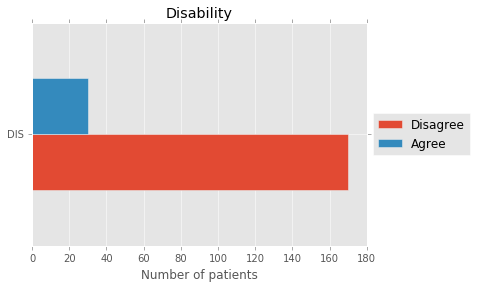

In [143]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Disability")
plt.set_xlabel("Number of patients")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt


In [144]:
features = ['DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'INJ', 'EXE', 'PSY', 'UNEMP', 'OPI', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']

target = ['DIS']

labels = df[target]["DIS"]

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["DIS"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['DUR' 'PIDAY' 'INJ' 'EXE' 'PSY' 'UNEMP' 'OPI' 'HEA' 'FIB' 'ERANDS']
Features sorted by their rank:
[(1, 'DUR'), (1, 'ERANDS'), (1, 'EXE'), (1, 'FIB'), (1, 'HEA'), (1, 'INJ'), (1, 'OPI'), (1, 'PIDAY'), (1, 'PSY'), (1, 'UNEMP'), (2, 'LBS'), (3, 'AS'), (4, 'CAT.NEVER'), (5, 'HOPEL'), (6, 'CAT.SAFE'), (7, 'SPROB'), (8, 'SLEEPQ'), (9, 'ABD'), (10, 'SEX'), (11, 'NRS'), (12, 'EMP'), (13, 'CHOR'), (14, 'FREQ'), (15, 'PPISOC'), (16, 'HELPL'), (17, 'WORTHL'), (18, 'RACE'), (19, 'ETOH'), (20, 'EDU'), (21, 'SREFR'), (22, 'DEPRES'), (23, 'STAIR'), (24, 'FUN'), (25, 'SLEEP'), (26, 'RAD'), (27, 'DEP'), (28, 'PICHOR'), (29, 'PI'), (30, 'LIT'), (31, 'JOI'), (32, 'SONSET'), (33, 'AGE'), (34, 'W15'), (35, 'HT'), (36, 'PIWORK'), (37, 'WT')]
Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose

*Accuracy is 0.91 for Logistic Regression classifier using top 10 features.*

In [146]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = svm.SVC(kernel='linear', C=1)

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["DIS"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['RAD' 'PIDAY' 'INJ' 'EXE' 'PSY' 'UNEMP' 'OPI' 'FIB' 'SLEEPQ' 'CAT.NEVER']
Features sorted by their rank:
[(1, 'CAT.NEVER'), (1, 'EXE'), (1, 'FIB'), (1, 'INJ'), (1, 'OPI'), (1, 'PIDAY'), (1, 'PSY'), (1, 'RAD'), (1, 'SLEEPQ'), (1, 'UNEMP'), (2, 'ERANDS'), (3, 'FREQ'), (4, 'SPROB'), (5, 'JOI'), (6, 'HOPEL'), (7, 'ABD'), (8, 'NRS'), (9, 'PPISOC'), (10, 'LBS'), (11, 'RACE'), (12, 'WORTHL'), (13, 'W15'), (14, 'DUR'), (15, 'EMP'), (16, 'HEA'), (17, 'CAT.SAFE'), (18, 'SONSET'), (19, 'AS'), (20, 'PIWORK'), (21, 'CHOR'), (22, 'PI'), (23, 'FUN'), (24, 'SEX'), (25, 'DEP'), (26, 'LIT'), (27, 'ETOH'), (28, 'AGE'), (29, 'HELPL'), (30, 'SLEEP'), (31, 'STAIR'), (32, 'PICHOR'), (33, 'EDU'), (34, 'SREFR'), (35, 'DEPRES'), (36, 'HT'), (37, 'WT')]
Model:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Cross valida

*Accuracy is 0.91 for SVM classifier using top 10 features.*

#### 29 - CAT.NEVER - I feel that my back pain is terrible and it’s never going to get any better.  

In [147]:
result = df[['CAT.NEVER']].apply(pd.value_counts).fillna(0).T
result.columns=['Disagree','Agree']
pd.options.display.float_format = '{:,.0f}'.format

# cross tabulated result
result

,Disagree,Agree
CAT.NEVER,125,75


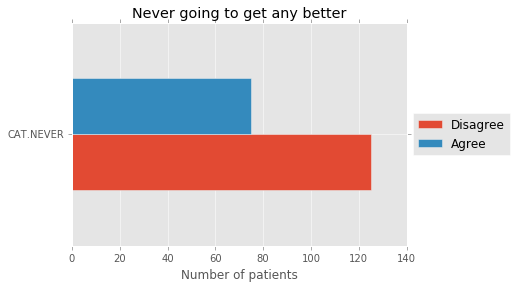

In [148]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

# horizontal bar plot
plt=result.plot.barh(title="Never going to get any better")
plt.set_xlabel("Number of patients")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt


In [149]:
features = ['DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'INJ', 'EXE', 'PSY', 'UNEMP', 'OPI', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'DIS', 'LIT', 'AS', 'ETOH', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP']

target = ['CAT.NEVER']

labels = df[target]["CAT.NEVER"]

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["CAT.NEVER"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['DUR' 'FREQ' 'RAD' 'LBS' 'UNEMP' 'ABD' 'SPROB' 'CAT.SAFE' 'LIT' 'AS']
Features sorted by their rank:
[(1, 'ABD'), (1, 'AS'), (1, 'CAT.SAFE'), (1, 'DUR'), (1, 'FREQ'), (1, 'LBS'), (1, 'LIT'), (1, 'RAD'), (1, 'SPROB'), (1, 'UNEMP'), (2, 'DEPRES'), (3, 'EDU'), (4, 'PICHOR'), (5, 'PIDAY'), (6, 'PPISOC'), (7, 'CHOR'), (8, 'DIS'), (9, 'STAIR'), (10, 'FUN'), (11, 'ERANDS'), (12, 'JOI'), (13, 'SLEEPQ'), (14, 'W15'), (15, 'ETOH'), (16, 'PSY'), (17, 'EMP'), (18, 'HEA'), (19, 'SLEEP'), (20, 'SONSET'), (21, 'FIB'), (22, 'SEX'), (23, 'EXE'), (24, 'RACE'), (25, 'INJ'), (26, 'OPI'), (27, 'HOPEL'), (28, 'HELPL'), (29, 'DEP'), (30, 'PI'), (31, 'NRS'), (32, 'SREFR'), (33, 'AGE'), (34, 'PIWORK'), (35, 'HT'), (36, 'WORTHL'), (37, 'WT')]
Model:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, 

*Accuracy is 0.68 for Logistic Regression classifier using top 10 features.*

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

model = svm.SVC(kernel='linear', C=1)

rfe = RFE(model, 10)
rfe = rfe.fit(df[features], df[target])

# summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

df[features].columns.values[rfe.support_]
features_top10 = df[features].columns.values[rfe.support_]
print("Top ten features:")
print(features_top10)

print ("Features sorted by their rank:")
print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

ff = df[features_top10]
model.fit(ff, labels)
print("Model:")
print(model)

scores = cross_val_score(model, ff, df[target]["CAT.NEVER"], cv=10)
print( "Cross validation scores using top 10 features")
print(scores )                                             

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Mean accuracy using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Top ten features:
['FREQ' 'PICHOR' 'LBS' 'INJ' 'UNEMP' 'CHOR' 'SREFR' 'CAT.SAFE' 'LIT' 'AS']
Features sorted by their rank:
[(1, 'AS'), (1, 'CAT.SAFE'), (1, 'CHOR'), (1, 'FREQ'), (1, 'INJ'), (1, 'LBS'), (1, 'LIT'), (1, 'PICHOR'), (1, 'SREFR'), (1, 'UNEMP'), (2, 'HEA'), (3, 'OPI'), (4, 'FUN'), (5, 'STAIR'), (6, 'ETOH'), (7, 'SEX'), (8, 'RAD'), (9, 'RACE'), (10, 'ABD'), (11, 'EXE'), (12, 'DEPRES'), (13, 'SLEEPQ'), (14, 'PIWORK'), (15, 'SLEEP'), (16, 'W15'), (17, 'PI'), (18, 'EMP'), (19, 'SPROB'), (20, 'DIS'), (21, 'HELPL'), (22, 'PIDAY'), (23, 'NRS'), (24, 'ERANDS'), (25, 'DUR'), (26, 'JOI'), (27, 'FIB'), (28, 'PPISOC'), (29, 'HOPEL'), (30, 'DEP'), (31, 'SONSET'), (32, 'AGE'), (33, 'PSY'), (34, 'WORTHL'), (35, 'EDU'), (36, 'HT'), (37, 'WT')]
Model:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Cross validation s

*Accuracy is 0.74 for SVM classifier using top 10 features.*

#### Review the predictive accuracy of all individual features

In [160]:
ml_dict = {
    'DUR':'regression',  
    'FREQ':'classification',
    'NRS':'regression',
    'RAD':'classification', 
    'PIDAY':'classification',
    'PIWORK':'regression',
    'PPISOC':'regression',
    'PICHOR':'regression',
    'LBS':'classification',  
    'LBST':'regression', 
    'FUS':'classification',
    'OPI':'classification', 
    'INJ':'classification',
    'EXE':'classification',  
    'PSY':'classification', 
    'UNEMP':'classification', 
    'DIS':'classification', 
    'ABD':'regression',
    'JOI':'regression',    
    'HEA':'regression',
    'FIB':'classification',
    'CHOR':'regression',   
    'STAIR':'regression',    
    'W15':'regression',    
    'ERANDS':'regression',   
    'WORTH':'regression',   
    'HELPL':'regression',    
    'DEPRES':'regression',    
    'HOPEL':'regression',   
    'SLEEPQ':'regression',   
    'SREFR':'regression',   
    'SPROB':'regression',   
    'SONSET':'regression',   
    'CAT.SAFE':'classification',
    'CAT.NEVER':'classification',
    'LIT':'classification',
    'AS':'classification',
    'ETOH':'classification',
    'SAHELP':'classification', 
    'AGE':'regression',   
    'SEX':'classification', 
    'HIS':'classification', 
    'NAT':'classification', 
    'ASA':'classification', 
    'BL':'classification', 
    'PAC':'classification', 
    'W':'classification', 
    'UNK':'classification', 
    'NA.':'classification', 
    'EMP':'classification', 
    'EDU':'regression', 
    'SMOK':'classification',  
    'HT':'regression', 
    'WT':'regression', 
    'RACE':'classification',
    'PI':'classification',
    'FUN':'classification', 
    'DEP':'classification',
    'SLEEP':'classification'}


In [169]:
def xfold_rfe_classification(model, df_features, df_target) :
    
    labels = df_target[f]

    rfe = RFE(model, 10)
    rfe = rfe.fit(df_features, df_target)

    df_features.columns.values[rfe.support_]
    features_top10 = df_features.columns.values[rfe.support_]
    print("Top ten features:")
    print(features_top10)
    print()
    print ("Features sorted by their rank:")
    print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

    ff = df_features[features_top10]
    model.fit(ff, labels)
    #print("Model:")
    #print(model)

    scores = cross_val_score(model, ff, df_target[f], cv=10)
#     print( "Cross validation scores using top 10 features")
#     print(scores ) 
    print()

    # The mean score and the 95% confidence interval of the score estimate are hence given by:
    print("Mean cross-validated accuracy for predicting", f, "using top 10 features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
          

In [229]:
import sklearn
from sklearn.linear_model import LinearRegression
import math

def train_test_rfe_regression(model, df_features, df_target) :
    
    labels = df_target[f]

    rfe = RFE(model, 10)
    rfe = rfe.fit(df_features, df_target)

    df_features.columns.values[rfe.support_]
    features_top10 = df_features.columns.values[rfe.support_]
    print("Top ten features:")
    print(features_top10)
    print()
    print ("Features sorted by their rank:")
    print ( sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)) )

    ff = df_features[features_top10]
    model.fit(ff, labels)
    #print("Model:")
    #print(model)num_folds = 10

    model = LinearRegression()
    scoring = 'r2'
    results = cross_val_score(model, ff, labels, scoring=scoring)
    print()
    print("Regression max, min:", labels.max(), labels.min())
    print("R^2 mean and std: ", results.mean(), results.std())
    
    scoring = 'neg_mean_absolute_error'
    results = cross_val_score(model, ff, labels, scoring=scoring)
    print("Neg. mean absolute error: ", results.mean(), results.std())

    scoring = 'neg_mean_squared_error'
    results = cross_val_score(model, ff, labels, scoring=scoring)
    print("Neg. mean squared error: ", results.mean(), results.std())
    print("Root mean squared error: ", math.sqrt( -results.mean() ) )

#     scores = cross_val_score(model, ff, df_target[f], cv=10)
#     X_train, X_test, Y_train, Y_test = train_test_split(ff, labels)
    
#     # Build a linear regression on the training data only
#     model.fit(X_train,Y_train)

#     # Predictions on training and testing sets
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
    
#         # The coefficients
#     print('Coefficients: \n', model.coef_)
    
#     # Explained variance score: 1 is perfect prediction
# #     print('Regression variance score: %.2f' % regr.score(X_test, Y_test))

#     print("Regression model MSE on training data: %.2f"  % np.mean((Y_train - pred_train) ** 2) )
    
#     print("Regression model MSE on held-out test data: %.2f"  % np.mean((Y_test - pred_test) ** 2) )
          

In [230]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [231]:
all_features = ['DUR', 'FREQ', 'NRS', 'RAD', 'PIDAY', 'PIWORK', 'PPISOC',
       'PICHOR', 'LBS', 'INJ', 'EXE', 'PSY', 'UNEMP', 'OPI', 'ABD',
       'JOI', 'HEA', 'FIB', 'CHOR', 'STAIR', 'W15', 'ERANDS', 'WORTHL',
       'HELPL', 'DEPRES', 'HOPEL', 'SLEEPQ', 'SREFR', 'SPROB', 'SONSET',
       'CAT.SAFE', 'CAT.NEVER', 'LIT', 'AS', 'ETOH', 'AGE', 'SEX',
       'EMP', 'EDU', 'HT', 'WT', 'RACE', 'PI', 'FUN', 'DEP', 'SLEEP', 'DIS']

classification = LogisticRegression()
regression = LinearRegression()

for f in all_features:
    features = [x for x in all_features if x!=f]
    ml_type = ml_dict.get(f)
    target = [f]
    print()
    print( "****************************" )
    print( "Feature:", f )
    print( ml_type) 
        
    result = df[[f]].apply(pd.value_counts).fillna(0).T
    #result.columns=['Disagree','Agree']
    pd.options.display.float_format = '{:,.0f}'.format
    # cross tabulated result
    print( result )
    print()
    
    if( ml_type == 'classification'):
        xfold_rfe_classification(classification, df[features], df[target])
    else:
        train_test_rfe_regression(regression, df[features], df[target])

    # horizontal bar plot
#     plt=result.plot.barh(title="Never going to get any better")
#     plt.set_xlabel("Number of patients")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()


****************************
Feature: DUR
regression
       4   3  2  1
DUR  123  65  7  5

Top ten features:
['RAD' 'LBS' 'INJ' 'PSY' 'OPI' 'HEA' 'FIB' 'HELPL' 'CAT.SAFE' 'LIT']

Features sorted by their rank:
[(1, 'CAT.SAFE'), (1, 'FIB'), (1, 'HEA'), (1, 'HELPL'), (1, 'INJ'), (1, 'LBS'), (1, 'LIT'), (1, 'OPI'), (1, 'PSY'), (1, 'RAD'), (2, 'WORTHL'), (3, 'SLEEPQ'), (4, 'SPROB'), (5, 'SREFR'), (6, 'SLEEP'), (7, 'EXE'), (8, 'PPISOC'), (9, 'PIWORK'), (10, 'PI'), (11, 'PIDAY'), (12, 'STAIR'), (13, 'CAT.NEVER'), (14, 'ETOH'), (15, 'DIS'), (16, 'DEPRES'), (17, 'DEP'), (18, 'HOPEL'), (19, 'PICHOR'), (20, 'CHOR'), (21, 'FUN'), (22, 'NRS'), (23, 'JOI'), (24, 'ABD'), (25, 'SEX'), (26, 'SONSET'), (27, 'UNEMP'), (28, 'EMP'), (29, 'W15'), (30, 'EDU'), (31, 'AGE'), (32, 'FREQ'), (33, 'AS'), (34, 'HT'), (35, 'RACE'), (36, 'WT'), (37, 'ERANDS')]

Regression max, min: 4 1
R^2 mean and std:  -0.00619178835198 0.159792268178
Neg. mean absolute error:  -0.558903460781 0.043985529313
Neg. mean squared er

### STOP